# IMPLEMENTATION OF TECHNICAL INDICATORS IN PYTHON

* In finance, Technical Indicators are mathematical calculations which can be based on any historical data like price, volume, open Interest, volatility.
<br><br>
* They are "indicators" because the result of mathematical calculation "indicates" something.
<br><br>
* There are different categories of Indicators namely 
    1. Trend Indicator
    2. Momentum Indicator
    3. Volatility Indicator
<br><br>
* Technical Indicators are highly used especially by beginners as they are easy to use and visualize.

**Technical Indicators implemented in this jupyter notebook**
1. Simple Moving Average
2. Exponential Moving Average
3. Bollinger Bands
4. Simple Relative Strength Index
5. Exponential Relative Strength Index
6. Moving Average Convergence Divergence
7. Money Flow Index

In [1]:
#Importing Libraries

import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-bright')
plt.rcParams['figure.figsize'] = (15, 8)

#import warnings
#warnings.simplefilter(action='ignore')

In [2]:
#start_date = input("Enter start date in YYYY-MM-DD format: ")
#end_date = input("Enter input date in YYY-MM-DD format: ")

start_date = '2019-01-01'
end_date = '2021-12-31'

data = yf.download('RELIANCE.NS', start=start_date, end=end_date, interval='1d', auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2019-01-01 to 2021-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    741 non-null    float64
 1   High    741 non-null    float64
 2   Low     741 non-null    float64
 3   Close   741 non-null    float64
 4   Volume  741 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.7 KB


In [4]:
data.describe()

,Open,High,Low,Close,Volume
count,741.00000,741.00000,741.00000,741.00000,741.00000
mean,1746.56323,1767.07219,1723.50302,1743.93896,11799157.81511
std,451.93218,454.62863,447.09051,450.33003,8525584.15953
min,901.30231,934.55276,861.41171,869.67511,787160.00000
25%,1315.25993,1330.51789,1296.27660,1310.75574,6475744.00000
50%,1818.20101,1852.04213,1786.35342,1818.40039,9346460.00000
75%,2107.22119,2126.19995,2081.25000,2102.13745,14097746.00000
max,2742.75000,2751.35010,2708.00000,2731.85010,65848350.00000


In [5]:
data.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-17,2398.05005,2408.00000,2320.00000,2340.44995,9714489
2021-12-20,2317.85010,2317.85010,2247.10010,2277.35010,6611376
2021-12-21,2311.35010,2346.00000,2292.19995,2311.25000,5924071
2021-12-22,2324.89990,2371.89990,2322.00000,2366.10010,8149415
2021-12-23,2374.00000,2380.00000,2358.05005,2365.25000,4186912
2021-12-24,2370.00000,2392.00000,2337.55005,2372.80005,3639616
2021-12-27,2361.55005,2378.00000,2348.10010,2370.25000,1853948
2021-12-28,2375.60010,2404.85010,2373.05005,2398.39990,2941883
2021-12-29,2391.00000,2419.00000,2382.10010,2402.50000,7118779


In [6]:
data.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174


In [7]:
'''
==== def plot_Close(data) ==== 

--> data is the entire dataframe having not just Open, Low, High, Close, Volume
--> the function has no return value, it just plots the data

'''

def plot_Close(data):
    data['Close'].plot()
    plt.title('Close Price Graph', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Price', fontsize=12)
    plt.grid()
    plt.show()

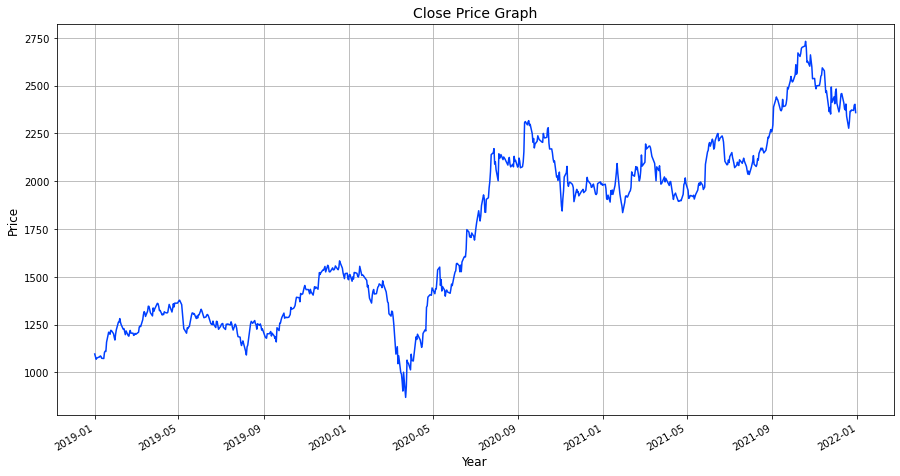

In [8]:
plot_Close(data)

### SIMPLE MOVING AVERAGE IMPLEMENTATION

In [9]:
'''
==== def SMA(data, n) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the rolling window of SMA it is "list" data type
--> the functions return the same datafrane by adding a columns SMA corresponding to n

'''

def SMA(data, n):
    for i in n:
        SMA = pd.Series(data['Close'].rolling(window=i).mean(), name = f'SMA_{i}') 
        data = data.join(SMA) 
    
    return data

In [10]:
# Calculating SMA for these following rolling window
n = [5, 10, 20, 50, 100, 200]

# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_SMA = data.copy()
data_SMA = SMA(data_SMA, n)
data_SMA.head(15)

,Open,High,Low,Close,Volume,SMA_5,SMA_10,SMA_20,SMA_50,SMA_100,SMA_200
Date,,,,,,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,1080.76211,NaN,NaN,NaN,NaN,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,1077.56299,NaN,NaN,NaN,NaN,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,1078.41414,NaN,NaN,NaN,NaN,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,1081.30020,NaN,NaN,NaN,NaN,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,1081.18279,NaN,NaN,NaN,NaN,NaN


In [11]:
'''
==== def plot_SMA(data, n) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the SMA values in different columns
--> n is the rolling window of SMA it is "list" data type
--> the function has no return value, it just plots the data

'''

def plot_SMA(data, n):
    plt.title('Simple Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.plot(data['Close'],lw=1, label='Close Price')
    for i in n:
        plt.plot(data[f'SMA_{i}'],lw=1, label=f'SMA_{i}')
        
    plt.legend()
    plt.grid()
    plt.show()

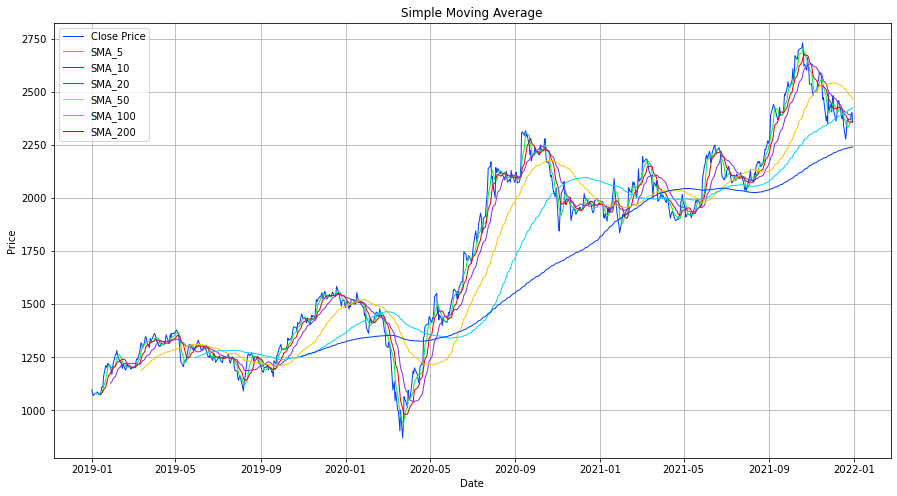

In [12]:
plot_SMA(data_SMA, n)

### EXPONENTIAL MOVING AVERAGE IMPLEMENTATION

In [13]:
'''
==== def EMA(data, n) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the rolling window of EMA it is "list" data type
--> the functions return the same datafrane by adding a columns EMA corresponding to n

'''

def EMA(data, n):
    for i in n:
        EMA = pd.Series(data['Close'].ewm(span=i, min_periods=i).mean(), name = f'EMA_{i}') 
        data = data.join(EMA) 
    
    return data

In [14]:
# Calculating EMA for these following rolling window
rolling_window = [5, 10, 20, 50, 100, 200]

# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_EMA = data.copy()
data_EMA = EMA(data_EMA, n)    
data_EMA.head(15)

,Open,High,Low,Close,Volume,EMA_5,EMA_10,EMA_20,EMA_50,EMA_100,EMA_200
Date,,,,,,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,1078.66007,NaN,NaN,NaN,NaN,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,1079.40672,NaN,NaN,NaN,NaN,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,1081.97873,NaN,NaN,NaN,NaN,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,1082.50353,NaN,NaN,NaN,NaN,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,1079.67767,NaN,NaN,NaN,NaN,NaN


In [15]:
'''
==== def plot_EMA(data, n) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the EMA values in different columns
--> n is the rolling window of EMA it is "list" data type
--> the function has no return value, it just plots the data

'''

def plot_EMA(data, n):
    plt.title('Exponential Moving Average')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.plot(data['Close'],lw=1, label='Close Price')
    for i in n:
        plt.plot(data[f'EMA_{i}'],lw=1, label=f'EMA_{i}')
        
    plt.legend()
    plt.grid()
    plt.show()

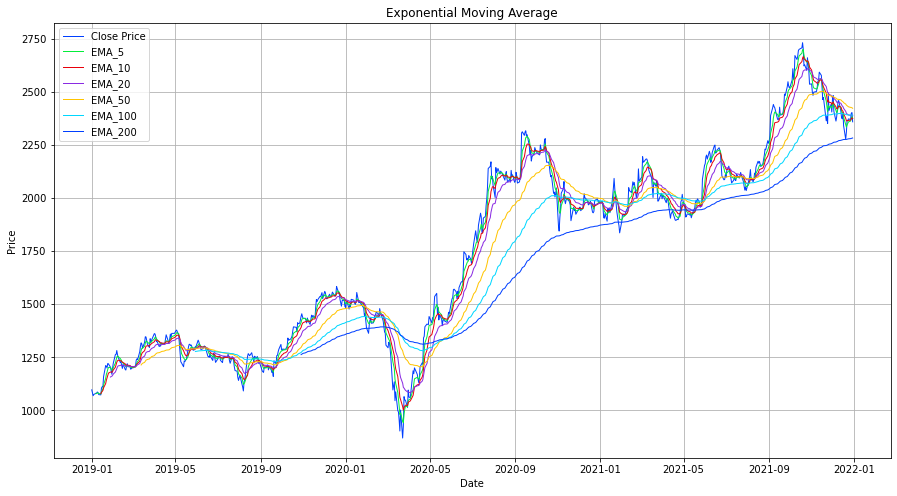

In [16]:
plot_EMA(data_EMA, n)

### BOLLINGER BANDS IMPLEMENTATION

Bollinger Bands is my favourite indicator. It is composed of three lines
* The **middle line** which is **Simple Moving Average (SMA_20 mostly)**
* The **uppder line** which is **(Middle_line + 2*std.dev_of_last_ndays)**
* The **lower line** which is **(Middle_line - 2*std.dev_of_last_ndays)**


In [17]:
'''
==== def BollingerBands(data, n, factor) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the period for the middle line SMA
--> factor is the multiplier of standard deviation, default=2
--> the functions return the same datafrane by adding columns for each band - upper, lower, middle

'''

def BollingerBands(data, n=20, factor=2):
    SMA = data['Close'].rolling(window=n).mean()
    Std_dev = data['Close'].rolling(window=n).std()
    data['MiddleBand'] = SMA
    data['UpperBand'] = SMA + (factor * Std_dev) 
    data['LowerBand'] = SMA - (factor * Std_dev)
    return data

In [18]:
# n is the period for SMA i.e the middle band
n = 20

# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_BB = data.copy()

data_BB = BollingerBands(data_BB, n)
data_BB.head(25)

,Open,High,Low,Close,Volume,MiddleBand,UpperBand,LowerBand
Date,,,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN,NaN,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN,NaN,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN,NaN,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN,NaN,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,NaN,NaN,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,NaN,NaN,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,NaN,NaN,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,NaN,NaN,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,NaN,NaN,NaN


In [19]:
'''
==== def plot_BollingerBands(data) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the Bollinger values in different columns
--> the function has no return value, it just plots the data

'''

def plot_BollingerBands(data):
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.plot(data['Close'],lw=1, label='Close Price')
    plt.plot(data['UpperBand'],'g',lw=1, label='Upper band')
    plt.plot(data['MiddleBand'],'r',lw=1, label='Middle band')
    plt.plot(data['LowerBand'],'g', lw=1, label='Lower band')
    plt.legend()
    plt.grid()
    plt.show()

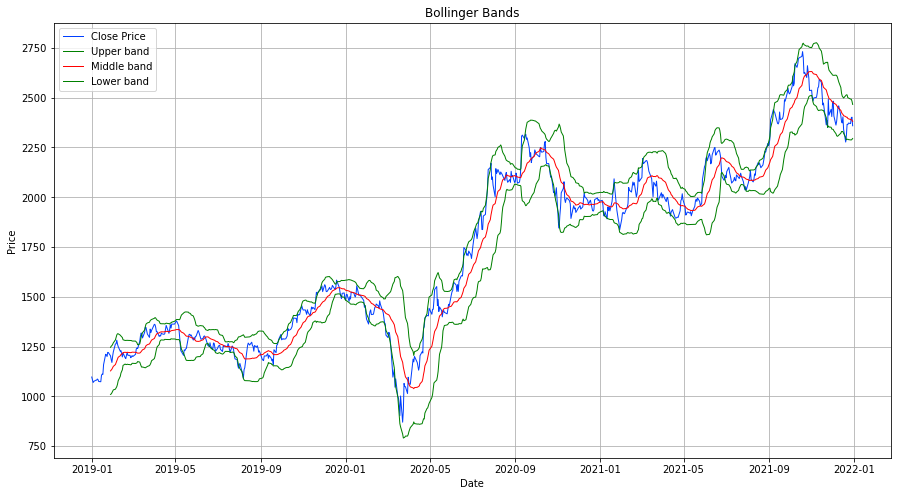

In [20]:
plot_BollingerBands(data_BB)

### SIMPLE RELATIVE STRENGTH INDEX

In [21]:
'''
==== def Simple_RSI(data, n) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the period for RSI calculation
--> the functions return the same datafrane by adding columns for RSI

'''

def Simple_RSI(data, n):
    data['Close_Diff'] = data['Close'].diff(periods=1)
    data['Upward'] = data['Close_Diff'].clip(lower=0)
    data['Downward'] = data['Close_Diff'].clip(upper=0)
    data['Downward'] = -data['Downward']
    data['Avg_up'] = pd.Series(data['Upward'].rolling(window=n).mean())
    data['Avg_down'] = pd.Series(data['Downward'].rolling(window=n).mean())
    data['RS_Factor'] = data['Avg_up']/data['Avg_down']
    data['S_RSI'] = 100 - 100/(1+data['RS_Factor'])
    data.drop(['Close_Diff', 'Upward', 'Downward', 'Avg_up', 'Avg_down', 'RS_Factor'], axis = 1, inplace=True)
    return data

In [22]:
n = 14

# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_RSI = data.copy()

data_RSI = Simple_RSI(data_RSI, n)
data_RSI.head(20)

,Open,High,Low,Close,Volume,S_RSI
Date,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,NaN


In [23]:
data_RSI['S_RSI'].describe()

count   727.00000
mean     53.73955
std      17.06338
min      10.04574
25%      40.87752
50%      51.91915
75%      67.52776
max      90.99780
Name: S_RSI, dtype: float64

In [24]:
'''
==== def plot_S_RSI(data, overbought, oversold) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the S_RSI value column
--> the function has no return value, it just plots the data

'''

def plot_S_RSI(data, overbought=85, oversold=25):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
    ax1.plot(data['Close'], label='Close')
    ax1.legend()
    ax1.grid()

    ax2.plot(data['S_RSI'], label='Simple RSI', color='teal')
    
    plt.fill_between(data.index, data['S_RSI'], where=(data['S_RSI'] < oversold), alpha=0.25, label='Oversold', color='green')
    plt.fill_between(data.index, data['S_RSI'], where=(data['S_RSI'] > overbought), alpha=0.25, label='Overbought', color='red')
    
    ax2.legend()
    ax2.set_title('Simple RSI Indicator')
    plt.show()

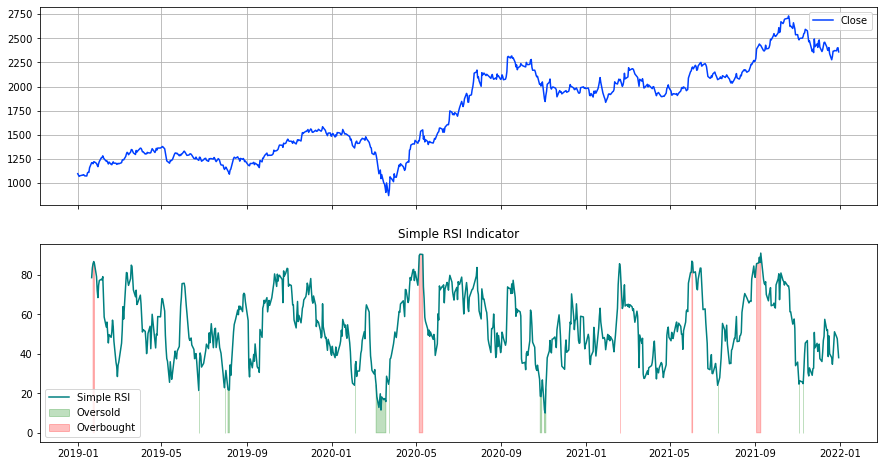

In [25]:
plot_S_RSI(data_RSI)

### EXPONENTIAL RELATIVE STRENGTH INDEX

In [26]:
'''
==== def Exponential_RSI(data, n) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the period for RSI calculation
--> the functions return the same datafrane by adding columns for RSI

'''

def Exponential_RSI(data, n):
    data['Close_Diff'] = data['Close'].diff(periods=1)
    data['Upward'] = data['Close_Diff'].clip(lower=0)
    data['Downward'] = data['Close_Diff'].clip(upper=0)
    data['Downward'] = -data['Downward']
    data['Avg_up'] = data['Upward'].ewm(com=n-1, adjust=True, min_periods=n).mean()
    data['Avg_down'] = data['Downward'].ewm(com=n-1, adjust=True, min_periods=n).mean()
    data['RS_Factor'] = data['Avg_up']/data['Avg_down']
    data['E_RSI'] = 100 - 100/(1+data['RS_Factor'])
    data.drop(['Close_Diff', 'Upward', 'Downward', 'Avg_up', 'Avg_down', 'RS_Factor'], axis = 1, inplace=True)
    return data

In [27]:
n = 14

# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_RSI = Exponential_RSI(data_RSI, n)
data_RSI.head(20)

,Open,High,Low,Close,Volume,S_RSI,E_RSI
Date,,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,NaN,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,NaN,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,NaN,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,NaN,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,NaN,NaN


In [28]:
data_RSI['E_RSI'].describe()

count   727.00000
mean     53.98680
std      12.78033
min      16.99064
25%      45.01418
50%      52.88125
75%      64.17540
max      86.60872
Name: E_RSI, dtype: float64

In [29]:
'''
==== def plot_E_RSI(data, overbought, oversold) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the E_RSI value column
--> the function has no return value, it just plots the data

'''

def plot_E_RSI(data, overbought=70, oversold=30):
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
    ax1.plot(data['Close'], label='Close')
    ax1.legend()
    ax1.grid()

    ax2.plot(data['E_RSI'], label='Exponential RSI')

    plt.fill_between(data.index, data['E_RSI'], where=(data['E_RSI'] < oversold), alpha=0.25, label='Oversold', color='green')
    plt.fill_between(data.index, data['E_RSI'], where=(data['E_RSI'] > overbought), alpha=0.25, label='Overbought', color='red')

    ax2.legend()
    ax2.set_title('Exponential RSI Indicator')
    plt.show()

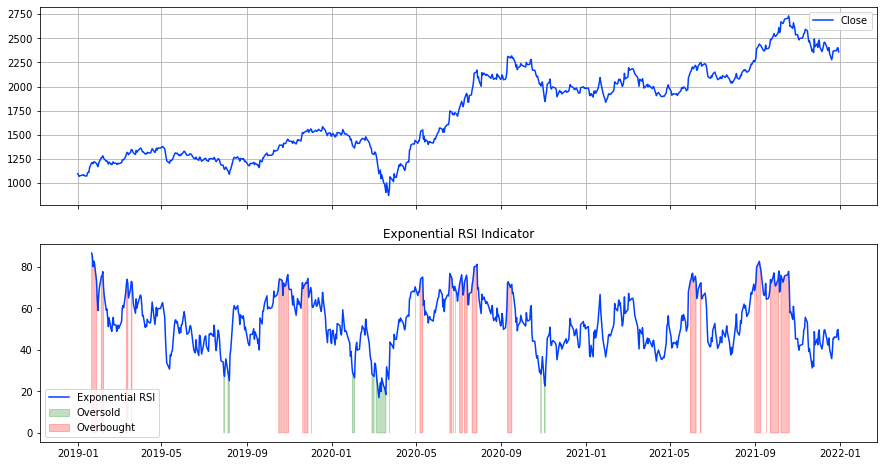

In [30]:
plot_E_RSI(data_RSI)

### MOVING AVERAGE CONVERGENCE DIVERGENCE

In [31]:
'''
==== def MACD(data, longEMA, shortEMA, signalEMA) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> longEMA is the period for longer EMA
--> shortEMA is the period for shorter EMA
--> signalEMA is the period for signal line EMA
--> the functions return the same datafrane by adding columns for MACD, signal, Convergence/Divergence

'''

def MACD(data, longEMA=26, shortEMA=12, signalEMA=9):
    data['fast'] = data['Close'].ewm(span=shortEMA, adjust=False, min_periods=shortEMA).mean()
    data['slow'] = data['Close'].ewm(span=longEMA, adjust=False, min_periods=longEMA).mean()
    data['MACD'] = data['fast'] - data['slow']
    data['signal'] = data['MACD'].ewm(span=signalEMA, adjust=False, min_periods=signalEMA).mean()
    data['Convergence/Divergence'] = data['MACD'] - data['signal']
    data.drop(['fast', 'slow'], axis = 1, inplace=True)
    return data

In [32]:
# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_MACD = data.copy()

data_MACD = MACD(data_MACD)
data_MACD.head(40)

,Open,High,Low,Close,Volume,MACD,signal,Convergence/Divergence
Date,,,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN,NaN,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN,NaN,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN,NaN,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN,NaN,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,NaN,NaN,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,NaN,NaN,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,NaN,NaN,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,NaN,NaN,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,NaN,NaN,NaN


In [33]:
'''
==== def plot_MACD(data) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly MACD, signal, Convergence/Divergence
--> the function has no return value, it just plots the data

'''

def plot_MACD(data):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
    ax1.plot(data['Close'], label='Close')
    ax1.legend()
    ax1.grid()

    hist = data['Convergence/Divergence']
    for i in range(len(hist)):
        if hist[i] < 0:
            ax2.bar(hist.index[i], hist[i], color='red')
        if hist[i] > 0:
            ax2.bar(hist.index[i], hist[i], color='green')
        else:
            pass

    ax2.plot(data['MACD'], label='MACD')
    ax2.plot(data['signal'], label='Signal')
    ax2.legend()
    ax2.set_title('MACD Indicator')
    plt.show()

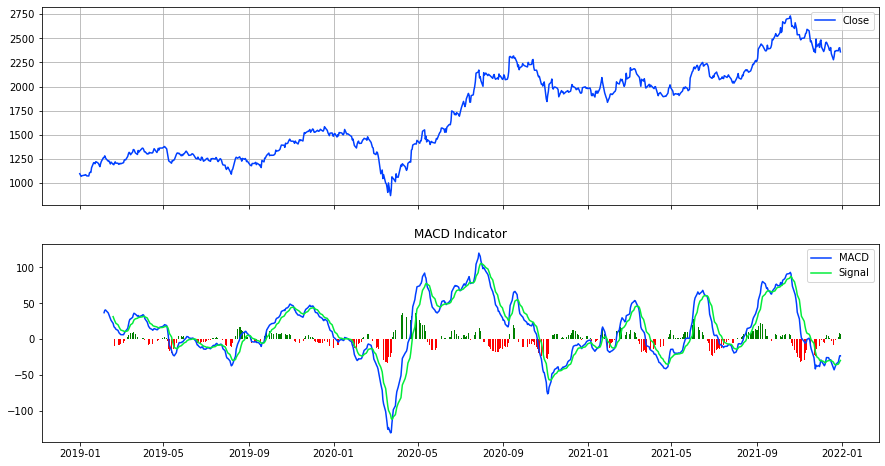

In [34]:
plot_MACD(data_MACD)

### MONEY FLOW INDEX

In [35]:
'''
==== def Money_Flow_Index(data, n) ==== 

--> data is the entire dataframe having Open, Low, High, Close, Volume
--> n is the period for MFI calculation
--> the functions return the same datafrane by adding columns for MFI

'''

def Money_Flow_Index(data, n=14):
    data['Positive_Flow']=0
    data['Negative_Flow']=0
    
    typical_price = (data['High']+data['Low']+data['Close'])/3
    money_flow = typical_price*data['Volume']
    positive_flow = data['Positive_Flow'].to_numpy()
    negative_flow = data['Negative_Flow'].to_numpy()
    
    for i in range(1, len(data.index)):
        if typical_price[i] > typical_price[i-1]:
            positive_flow[i] = money_flow[i]
            
        elif typical_price[i] < typical_price[i-1]:
            negative_flow[i] = money_flow[i]

    
    positive_sum = pd.Series(positive_flow).ewm(com=n-1, adjust=True, min_periods=n).mean()
    negative_sum = pd.Series(negative_flow).ewm(com=n-1, adjust=True, min_periods=n).mean()
    
    MFI = np.empty(positive_flow.shape)
    MF_Ratio = np.empty(positive_flow.shape)
    for i in range(0, len(data.index)):
        MF_Ratio[i] = positive_sum[i]/negative_sum[i]
        MFI[i] = 100-(100/(1+MF_Ratio[i]))
    
    
    data['MFI'] = MFI
    data.drop(['Positive_Flow', 'Negative_Flow'], axis = 1, inplace=True)
    return data

In [36]:
# Copying the value of dataframe into another so as to keep the original dataframe undisturbed
data_MFI = data.copy()
data_MFI = Money_Flow_Index(data_MFI)

data_MFI.head(30)

,Open,High,Low,Close,Volume,MFI
Date,,,,,,
2019-01-01,1100.85683,1102.86240,1086.03519,1096.69897,4498087,NaN
2019-01-02,1090.33992,1102.56889,1077.13252,1082.41541,7212697,NaN
2019-01-03,1083.49160,1090.43768,1066.46884,1069.06140,7517041,NaN
2019-01-04,1073.61058,1080.50771,1057.66390,1074.83350,8545382,NaN
2019-01-07,1083.00238,1094.20421,1077.13251,1080.80127,5565822,NaN
2019-01-08,1081.14364,1085.88849,1072.24093,1080.70337,5678473,NaN
2019-01-09,1087.89406,1092.78563,1074.88232,1086.67114,5821468,NaN
2019-01-10,1083.73631,1086.91585,1079.08923,1083.49170,4118960,NaN
2019-01-11,1083.58944,1089.65510,1065.00137,1074.24646,6525174,NaN


In [37]:
data_MFI['MFI'].describe()

count   728.00000
mean     54.95081
std      12.97269
min       9.91877
25%      47.10664
50%      54.58317
75%      64.10302
max      86.03636
Name: MFI, dtype: float64

In [38]:
'''
==== def plot_MFI(data, overbought, oversold) ==== 

--> data is the entire dataframe having not just [O,L,H,C,V] columns but more importantly the MFI value column
--> the function has no return value, it just plots the data

'''

def plot_MFI(data, overbought=80, oversold=20):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
    ax1.plot(data['Close'], label='Close')
    ax1.legend()
    ax1.grid()

    ax2.plot(data['MFI'], label='Money Flow Index', color='indigo')

    plt.fill_between(data.index, data['MFI'], where=(data['MFI'] < oversold), alpha=0.25, label='Oversold', color='green')
    plt.fill_between(data.index, data['MFI'], where=(data['MFI'] > overbought), alpha=0.25, label='Overbought', color='red')

    ax2.legend()
    ax2.set_title('Money Flow Index')
    plt.show()

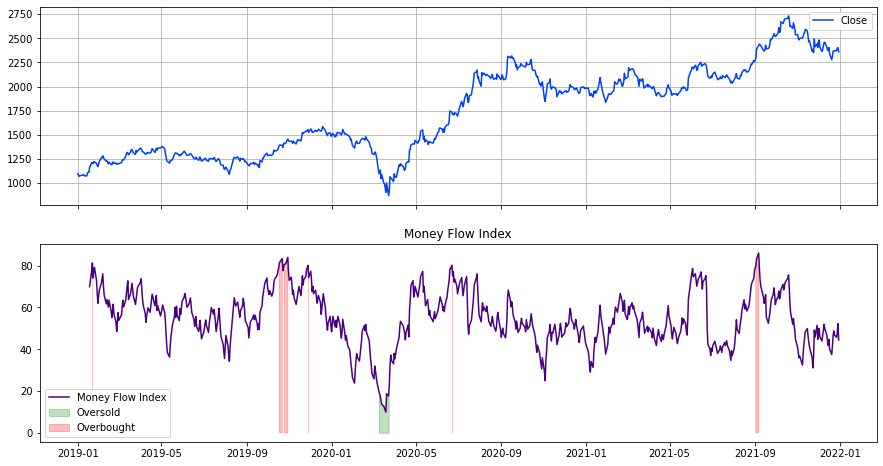

In [39]:
plot_MFI(data_MFI)